<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/04_1_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression

Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**Multi-Variable Data**

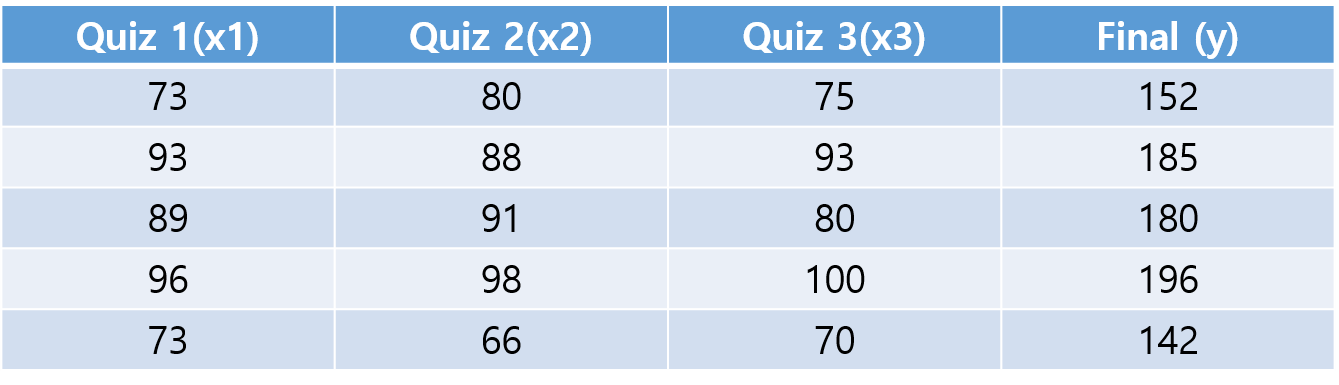

**with Native operation**

In [ ]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

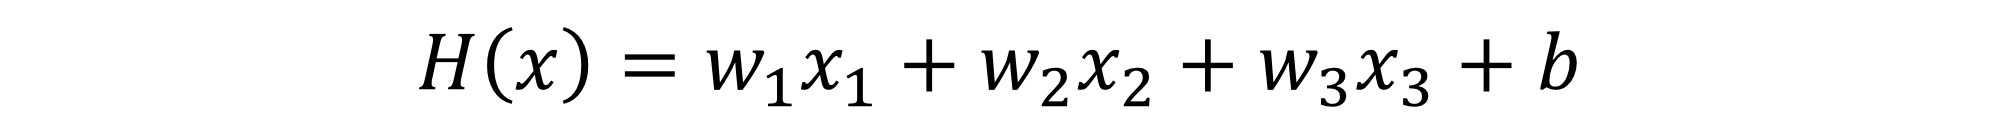

In [ ]:
# 모델 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079390


**with MatMul**

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


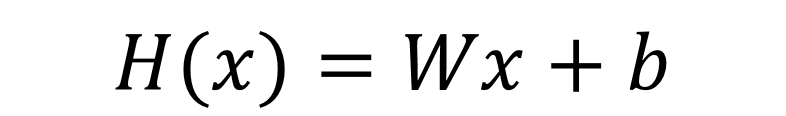

In [ ]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))

Epoch    0/1000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/1000 hypothesis: tensor([152.7691, 183.6985, 180.9591, 197.0627, 140.1336]) Cost: 1.563628
Epoch  200/1000 hypothesis: tensor([152.7273, 183.7273, 180.9465, 197.0517, 140.1731]) Cost: 1.497595
Epoch  300/1000 hypothesis: tensor([152.6866, 183.7554, 180.9343, 197.0409, 140.2116]) Cost: 1.435044
Epoch  400/1000 hypothesis: tensor([152.6470, 183.7827, 180.9224, 197.0304, 140.2491]) Cost: 1.375726
Epoch  500/1000 hypothesis: tensor([152.6085, 183.8093, 180.9108, 197.0201, 140.2856]) Cost: 1.319507
Epoch  600/1000 hypothesis: tensor([152.5711, 183.8352, 180.8996, 197.0101, 140.3211]) Cost: 1.266222
Epoch  700/1000 hypothesis: tensor([152.5346, 183.8604, 180.8887, 197.0003, 140.3557]) Cost: 1.215703
Epoch  800/1000 hypothesis: tensor([152.4992, 183.8849, 180.8780, 196.9908, 140.3895]) Cost: 1.167810
Epoch  900/1000 hypothesis: tensor([152.4647, 183.9087, 180.8677, 196.9814, 140.4223]) Cost: 1.122429
Epoch 

**with nn.Module**

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))

Epoch    0/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 64999.386719
Epoch  100/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 3.096467
Epoch  200/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.948699
Epoch  300/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.808676
Epoch  400/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.676002
Epoch  500/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.550294
Epoch  600/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.431169
Epoch  700/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.318305
Epoch  800/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 140.4543]) Cost: 2.211358
Epoch  900/1000 hypothesis: tensor([152.4312, 183.9319, 180.8577, 196.9723, 14